In [ ]:
__author__ = "Dong Qichen"
__license__ = "GPL"
__version__ = "3.0"

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib import animation
import IPython.display
import scipy
import sympy.vector

In [7]:
def solution(x, y, n):
    def solution_n(x, y, n, a=1):
        return np.exp(-n*x/a)*np.sin(n*np.pi*y/a)/n
    z = np.zeros_like(y)
    for nn in np.arange(1,n+1):
        if nn % 2 == 1:
            z += solution_n(x, y, nn)
    return z



In [8]:
x_grid, y_grid = np.meshgrid(np.linspace(0,2,100), np.linspace(0,1,100))
fig = plt.figure(figsize=(16, 9), dpi=1080/18)
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, 2), ylim=(0, 1), zlim=(0,1), projection = '3d')
mesh = ax.plot_surface(x_grid, y_grid, np.zeros_like(x_grid), cmap=cm.coolwarm, vmin=0, vmax=1.0)
a_text = ax.text(0.02, 0.85, 0.9, '', transform=ax.transAxes, fontsize=15)
cb = plt.colorbar(mesh)

def animate(n):
    ft = solution(x_grid, y_grid, n)
    ax.clear()
    ax.set_zlim(0, 1)
    mesh = ax.plot_surface(x_grid, y_grid, ft, cmap=cm.coolwarm, vmin=0, vmax=1)
    a_text = ax.text(0.02, 0.85, 0.9, 'n = {}'.format(n), transform=ax.transAxes, fontsize=15)
    return mesh, a_text

anim = animation.FuncAnimation(
    fig, 
    animate, 
    frames=np.arange(1, 100, 3), 
    interval=1000, 
    blit=True
)
plt.close(fig)
IPython.display.HTML(anim.to_html5_video())

/tmp/ipykernel_74609/3332354132.py:2: RuntimeWarning: divide by zero encountered in divide
  return 0.5 * np.arctan(np.sin(np.pi*y) / np.sinh(np.pi*x))
/tmp/ipykernel_74609/3332354132.py:2: RuntimeWarning: invalid value encountered in divide
  return 0.5 * np.arctan(np.sin(np.pi*y) / np.sinh(np.pi*x))


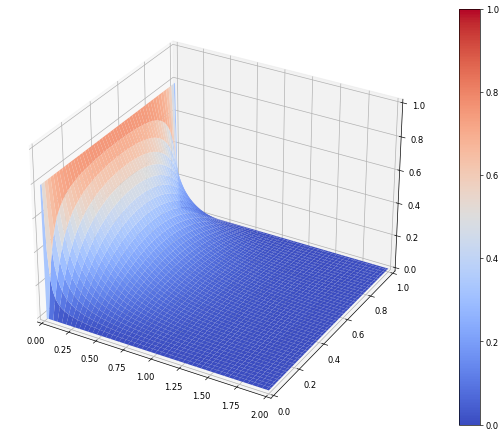

In [9]:
def solution_exact(x, y):
    return 0.5 * np.arctan(np.sin(np.pi*y) / np.sinh(np.pi*x))
fig = plt.figure(figsize=(16, 9), dpi=1080/18)
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, 2), ylim=(0, 1), zlim=(0,1), projection = '3d')
mesh = ax.plot_surface(x_grid, y_grid, solution_exact(x_grid, y_grid), cmap=cm.coolwarm, vmin=0, vmax=1.0)
a_text = ax.text(0.02, 0.85, 0.9, '', transform=ax.transAxes, fontsize=15)
cb = plt.colorbar(mesh)

In [10]:
fig = plt.figure(figsize=(16, 9), dpi=1080/18)
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, 1), ylim=(0, 1))
ax.grid()
a_text = ax.text(0.02, 0.80, '', transform=ax.transAxes, fontsize=30)
exact_line, = ax.plot([], [], '-', lw=2)


def animate(x):
    y = np.linspace(0, 2, 1000)
    z1 = solution_exact(x,y)
    z2 = solution(x,y,100)
    exact_line.set_data(y, z1)
    a_text.set_text('x = {:.2f}'.format(x))
    return exact_line

anim = animation.FuncAnimation(
    fig, 
    animate, 
    frames=np.linspace(0,1,1000), 
    interval=30, 
    # blit=True,
    repeat=False,
)
plt.close(fig)
IPython.display.HTML(anim.to_html5_video())

/tmp/ipykernel_74609/3332354132.py:2: RuntimeWarning: divide by zero encountered in divide
  return 0.5 * np.arctan(np.sin(np.pi*y) / np.sinh(np.pi*x))
/tmp/ipykernel_74609/3332354132.py:2: RuntimeWarning: invalid value encountered in divide
  return 0.5 * np.arctan(np.sin(np.pi*y) / np.sinh(np.pi*x))
